In [20]:
# ----------------------------------------------------------------------
# **Part 1: File Set Up**
# ----------------------------------------------------------------------

#===========DEPENDENCIES=============
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import requests

pd.set_option('display.max_columns', None)

In [21]:
#============IMPORT==============
csv_file_path = os.path.join('Resources', 'accidents_2014.csv')
traffic_df = pd.read_csv(csv_file_path)

In [22]:
#============DROP BLANK COLUMNS===========

traffic_df.dropna(
    axis=1,
    how='all',
    inplace=True
)

#============DROP BLANK ROWS WITH BLANK VALUES==========

traffic_df['Junction_Control'].replace(
    np.nan, 'None', inplace=True)

traffic_df.replace(
    '', np.nan, inplace=True)

traffic_df.replace(
    'Unknown', np.nan, inplace=True)

traffic_df.dropna(axis=0, inplace=True)

#===========REPLACING ERRANT/MISPELLED VALUES===============

traffic_df['Light_Conditions'].replace(
    'Darkeness: No street lighting',
    'Darkness: No street lighting', 
    inplace=True
)

traffic_df['Pedestrian_Crossing-Physical_Facilities'].replace(
    'non-junction pedestrian crossing',
    'Non-junction Pedestrian Crossing', 
    inplace=True
)

#===========RENAMING COLUMNS===============

traffic_df.rename(columns=
    {'Accident_Index' : 'Accident Index',
     'Longitude' : 'Longitude', 
     'Latitude' : 'Latitude', 
     'Police_Force' : 'Police Force', 
     'Accident_Severity' : 'Accident Severity', 
     'Number_of_Vehicles' : 'Number of Vehicles', 
     'Number_of_Casualties' : 'Number of Casualties', 
     'Date' : 'Date', 
     'Day_of_Week' : 'Day of Week', 
     'Time' : 'Time', 
     'Local_Authority_(District)' : 'Local Authority District', 
     'Local_Authority_(Highway)' : 'Local Authority Highway', 
     '1st_Road_Class' : '1st Road Class', 
     '1st_Road_Number' : '1st Road Number', 
     'Road_Type' : 'Road Type', 
     'Speed_limit' : 'Speed Limit', 
     'Junction_Control' : 'Junction Control', 
     '2nd_Road_Class' : '2nd Road Class', 
     '2nd_Road_Number' : '2nd Road Number', 
     'Pedestrian_Crossing-Human_Control' : 'Pedestrian Crossing Human Control', 
     'Pedestrian_Crossing-Physical_Facilities' : 'Pedestrian Crossing Physical Facilities', 
     'Light_Conditions' : 'Light Conditions', 
     'Weather_Conditions' : 'Weather Conditions', 
     'Road_Surface_Conditions' : 'Road Surface Conditions', 
     'Special_Conditions_at_Site' : 'Special Conditions at Site', 
     'Carriageway_Hazards' : 'Carriageway Hazards', 
     'Urban_or_Rural_Area' : 'Urban or Rural Area', 
     'Did_Police_Officer_Attend_Scene_of_Accident' : 'Police Attended Scene of Accident', 
     'LSOA_of_Accident_Location' : 'LSOA of Accident Location', 
     'Year' : 'Year', 
    }, inplace=True)

# format Date in Datetime format
traffic_df['Date'] = pd.to_datetime(traffic_df['Date'], format='%d/%m/%y')

# display cleaned file
traffic_df.head()

,Accident Index,Longitude,Latitude,Police Force,Accident Severity,Number of Vehicles,Number of Casualties,Date,Day of Week,Time,Local Authority District,Local Authority Highway,1st Road Class,1st Road Number,Road Type,Speed Limit,Junction Control,2nd Road Class,2nd Road Number,Pedestrian Crossing Human Control,Pedestrian Crossing Physical Facilities,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site,Carriageway Hazards,Urban or Rural Area,Police Attended Scene of Accident,LSOA of Accident Location,Year
0,201401BS70001,-0.206443,51.496345,1,3,2,1,2014-01-09,5,13:21,12,E09000020,3,315,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,No,E01002814,2014
1,201401BS70006,-0.171308,51.495892,1,3,2,1,2014-01-09,5,8:50,12,E09000020,3,4,Single carriageway,30,Giveway or uncontrolled,3,4,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002821,2014
2,201401BS70009,-0.201326,51.498245,1,3,2,1,2014-01-10,6,18:25,12,E09000020,3,315,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002817,2014
3,201401BS70011,-0.207445,51.507511,1,3,2,1,2014-01-10,6,10:55,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002871,2014
4,201401BS70013,-0.179731,51.497822,1,3,2,1,2014-01-05,1,20:26,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,5,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002892,2014


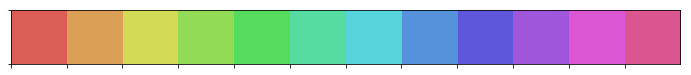

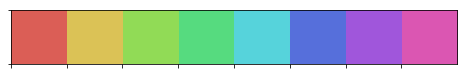

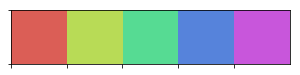

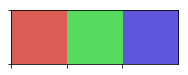

In [23]:
# ----------------------------------------------------------------------
# **Part 2: Set up overall formatting**
# ----------------------------------------------------------------------
# create color palette with 12 colors (for use with monthly data)
twelveColorPalette = sns.color_palette('hls', 12)
twelve = sns.palplot(twelveColorPalette)

# create color palette with 8 colors (for use with weather conditions)
eightColorPalette = sns.color_palette('hls', 8)
eight = sns.palplot(eightColorPalette)

# create color palette with 5 colors (for use with road/light conditions)
fiveColorPalette = sns.color_palette('hls', 5)
five = sns.palplot(fiveColorPalette)

# create color palette with 3 colors (for data by severity)
threeColorPalette = sns.color_palette('hls', 3)
three = sns.palplot(threeColorPalette)

# display color palettes
three
five
eight
twelve

# Weather and Severity Correlation 

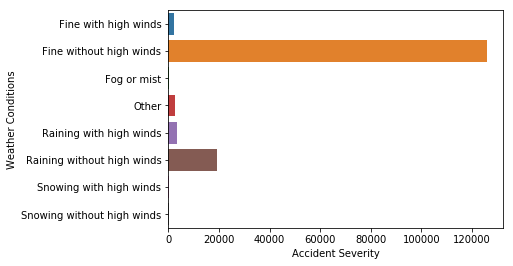

In [24]:
grouper_1 = traffic_df[['Weather Conditions','Accident Severity']]
weather_severity = grouper_1.groupby(by = 'Weather Conditions',as_index=False).sum()
plt = sns.barplot(weather_severity['Accident Severity'],weather_severity['Weather Conditions'])

# Severity and Weather Correlation

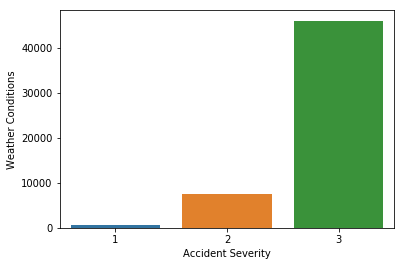

In [25]:
grouper_a = traffic_df[['Weather Conditions','Accident Severity']]
weather_severity_1 = grouper_a.groupby(by = 'Accident Severity',as_index=False).count()
plt1 = sns.barplot(weather_severity_1['Accident Severity'],weather_severity_1['Weather Conditions'])

# Light Condition and Severity Correlation

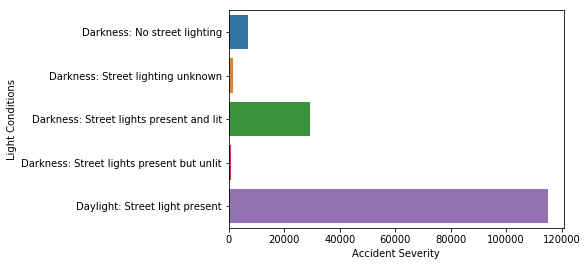

In [26]:
grouper_2 = traffic_df[['Light Conditions','Accident Severity']]
light_condition_severity = grouper_2.groupby(by = 'Light Conditions',as_index=False).sum()
plt = sns.barplot(light_condition_severity['Accident Severity'],light_condition_severity['Light Conditions'])

# Severity Condition and Light Condition

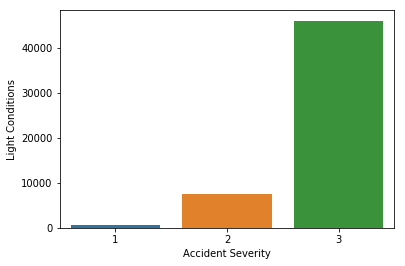

In [27]:
grouper_b = traffic_df[['Light Conditions','Accident Severity']]
light_condition_severity_1 = grouper_b.groupby(by = 'Accident Severity',as_index=False).count()
plt = sns.barplot(light_condition_severity_1['Accident Severity'],light_condition_severity_1['Light Conditions'])

# Road Type and Severity Correlation

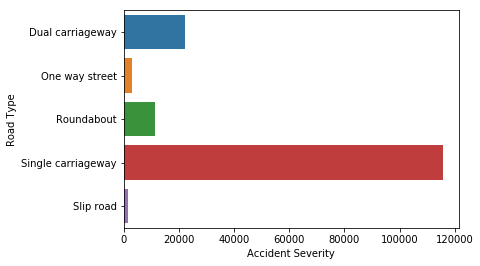

In [28]:
grouper_3 = traffic_df[['Road Type','Accident Severity']]
road_type_severity = grouper_3.groupby(by = 'Road Type',as_index=False).sum()
plt = sns.barplot(road_type_severity['Accident Severity'],road_type_severity['Road Type'])

# Severity and Road Type Correlation

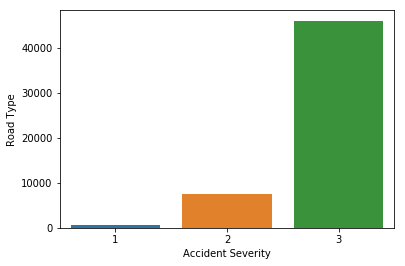

In [29]:
grouper_c = traffic_df[['Road Type','Accident Severity']]
road_type_severity_1 = grouper_c.groupby(by = 'Accident Severity',as_index=False).count()
plt = sns.barplot(road_type_severity_1['Accident Severity'],road_type_severity_1['Road Type'])

# Converting Weather Condition to Numbers 

In [30]:
weather_condition_number_list = []

for condition in traffic_df['Weather Conditions']:
    
    if (condition == 'Fine without high winds'):
        weather_condition_number_list.append(7)
        
    if (condition == 'Raining without high winds'):
        weather_condition_number_list.append(6)
        
    if (condition == 'Raining with high winds'):
        weather_condition_number_list.append(5)
        
    if (condition == 'Other'):
        weather_condition_number_list.append(4)
        
    if (condition == 'Fine with high winds'):
        weather_condition_number_list.append(3)
        
    if (condition == 'Fog or mist'):
        weather_condition_number_list.append(2)
    
    if (condition == 'Snowing without high winds'):
        weather_condition_number_list.append(1)
        
    if (condition == 'Snowing with high winds'):
        weather_condition_number_list.append(0)

# Converting Road Type to Numbers

In [31]:
road_type_number_list = []

traffic_df['Road Type'].value_counts()

for road in traffic_df['Road Type']:
    
    if (road == 'Single carriageway'):
        road_type_number_list.append(4)
    
    if (road == 'Dual carriageway'):
        road_type_number_list.append(3)
        
    if (road == 'Roundabout'):
        road_type_number_list.append(2)
        
    if (road == 'One way street'):
        road_type_number_list.append(1)
        
    if (road == 'Slip road'):
        road_type_number_list.append(0)

# Light Conditions to Numbers

In [32]:
light_condition_number_list = []

for condition in traffic_df['Light Conditions']:
    
    if (condition == 'Daylight: Street light present'):
        light_condition_number_list.append(4)

    if (condition == 'Darkness: Street lights present and lit'):
        light_condition_number_list.append(3)
        
    if (condition == 'Darkness: No street lighting'):
        light_condition_number_list.append(2)
        
    if (condition == 'Darkness: Street lighting unknown'):
        light_condition_number_list.append(1)
        
    if (condition == 'Darkness: Street lights present but unlit'):
        light_condition_number_list.append(0)
        

In [33]:
training_data = pd.DataFrame({'Weather':weather_condition_number_list,
                              'Road Type':road_type_number_list,
                              'Light Condition':light_condition_number_list                          
                              })


# Test Data

In [34]:
import random    

weather_testing = []
road_testing = []
light_testing = []

for i in range (54147):    
    weather_testing.append(random.randrange(0,8,1))  
    road_testing.append(random.randrange(0,5,1))
    light_testing.append(random.randrange(0,5,1))  
  
     

In [35]:
test_data = []
for i in range(54147):
    temp=[]
    temp.append(weather_testing[i])
    temp.append(road_testing[i])
    temp.append(light_testing[i])
    test_data.append(temp)      

# Training Algorithm

In [36]:
X = training_data[['Weather','Road Type','Light Condition']]
Y = traffic_df['Accident Severity']
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
prediction = clf.predict(test_data)

In [39]:
csv_data = pd.DataFrame({'Weather Conditions': weather_condition_number_list, 
                         'Road Type': road_type_number_list,
                         'Light Condition': light_condition_number_list,
                         'Severity': traffic_df['Accident Severity']
                        })
csv_data.to_csv('Resources/regression.csv')